# 📌 Introduction

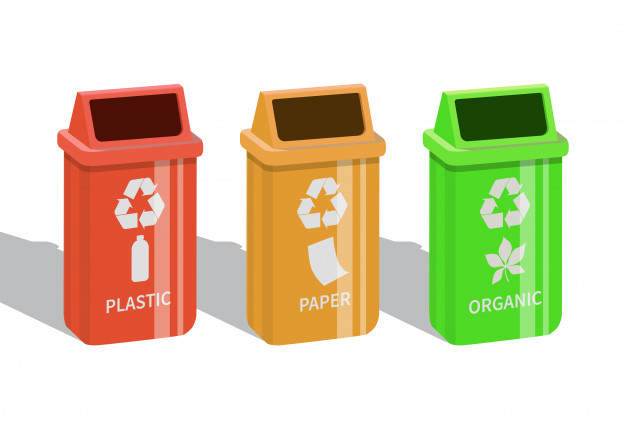

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [23]:
train_path = "TEST"
test_path = "TRAIN"

## Import Libraries

In [24]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


## Visualization

* O -> Organic
* R -> Recyclable

In [25]:
numberOfClass = 2

# Convolutional Neural Network - CNN

In [ ]:
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load pre-trained EfficientNetB5 without the top classification layer
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224,224, 3))

# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers
    layer.trainable = True

# Build the new model
model = models.Sequential()

# Add the pre-trained EfficientNetB5 model
model.add(base_model)

# Add custom layers for fine-tuning
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))  # Increased size for better learning capacity
model.add(layers.Dropout(0.4))  # Dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(numberOfClass, activation='softmax'))

# Compile the model with an adaptive learning rate optimizer
optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy' , metrics=['accuracy'])

batch_size = 32


In [ ]:
df_train = pd.read_csv('train_data.csv')
X_train = df_train.drop('label')
X_train = X_train.reshape(-1, 224,224, 1)  # Use (224,224, 1) for grayscale images

# If needed, resize to match the target size (e.g., 224x224) using np.repeat
X_train = np.repeat(X_train, 3, axis=-1)  # Convert grayscale to RGB by repeating channels
X_train = np.array([np.resize(img, (224, 224, 3)) for img in X])  # Resize images

# Normalize the data
X_train = X_train / 255.0  # Scale pixel values to [0, 1]
y_train = df_train.label

In [ ]:
df_test = pd.read_csv('test_data.csv')
X_test = df_test.drop('label')
X_test = X_test.reshape(-1, 224,224, 1)  # Use (224,224, 1) for grayscale images

# If needed, resize to match the target size (e.g., 224x224) using np.repeat
X_test = np.repeat(X_test, 3, axis=-1)  # Convert grayscale to RGB by repeating channels
X_test = np.array([np.resize(img, (224, 224, 3)) for img in X])  # Resize images

# Normalize the data
X_test = X_test / 255.0  # Scale pixel values to [0, 1]
y_test = df_test.label

In [ ]:
# Define data augmentation for training and scaling for testing
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator()

# Create generators using flow instead of flow_from_directory
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size
)

test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=batch_size
)


Found 2513 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [ ]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


KeyboardInterrupt: 

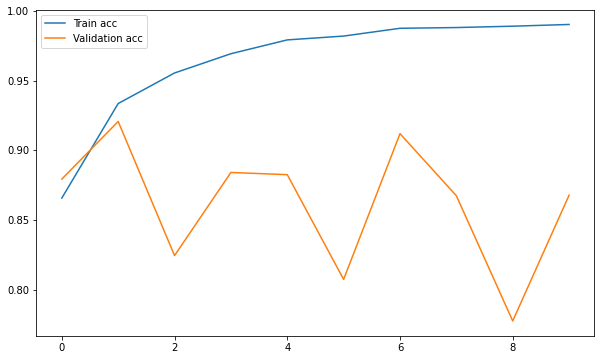

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

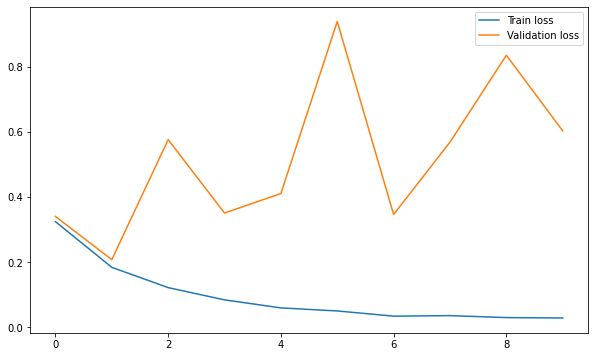

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img): 
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, 122, 122, 3), found shape=(None, 224, 224, 3)


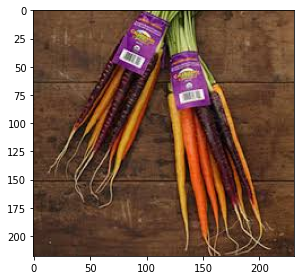

In [ ]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

In [ ]:
import cv2
import numpy as np

# Read and resize the image
test_img = cv2.resize(cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg"), (122, 122))

# Normalize the image (if required by your model)
test_img = test_img.astype('float32') / 255.0  # Scale to [0, 1]

# Add batch dimension
test_img = np.expand_dims(test_img, axis=0)  # Shape becomes (1, 122, 122, 3)

# Call the prediction function
predictions = predict_func(test_img)


In [ ]:
model.save('bio_nonbio.h5')